# Part I: 762 Data Science Assignment
# Connor McDowall cmcd398 530913386

Note: For the purposes of this assignment, the data has been downloaded manually through the respective URLs as is complete and will not need uploading.

### 1 Frame the Problem

#### 1.1 The Business Objectives

Predict the sales price for every home in the Ames, Iowa using the Ames Housing Dataset. Another objective is to submit our workings and prediction to the kaggle assignment.

This data has 79 explanatory variables decribing the aspects of residential homes in Ames, Iowa relating to property value. Some variables include: The building class, type of road access, flatness of the property, and type of utilities available.

The analysis enables home buyers to make informed decisions on the fair price of the home they wish to buy.

#### 1.2 How will your solution be used?  

The machine learning process will be a standalone notebook used to predict the sales price of a household based on a number of explanatory variables. The solution will predict the final price of each home. The solution will be used to compare my model's performance against the performance of the machine learning models my classmates will submit.

#### 1.3 What are the current solutions / workarounds?

Kaggle was not specific in how the sales prices were estimated, I assume in bidding processes or fixed prices facilitated by real estate agents. Dean de Cock collected this dataset from the Ames City Assessors Office who assign values to all taxable property in the Ames area.

#### 1.4 How should you frame this problem?

Supervised machine learning using muitple regression techniques like random forest and gradient boosting. The sample is sufficiently small so we can use batch learning and used offline.

#### 1.5 How should performance be measured?

The performance of the model should be measured by the Root Mean Square Error (RMSE). The performance is also compared against the guessing benchmark (~72695).

#### 1.6 Is the performance measure aligned with the business objective?

Yes as we are trying to estimate the sales price of each household, a value wher e comparison against the actual sales data is possible.

#### 1.7 What would be the minimum performance needed to reach the business objective?

The score (predicted sale price) calculated from our kaggle submission should be lower than the guessing benchmark. THE RMSE should also be below a threshold.

#### 1.8 What are comparable problems?

Experience:

Harrison & Rubinfeld (1978): Hedonic Housing Prices and the Demand for Clean Air, J.Environ. Economics & Management, Volume 5, 81-102 (Boston Housing Data set) and the California Housing Dataset used in lectures from Aurelien Geron.

Tools: The Python Library scikit-learn for machine learning, seaborn for   visualisations, pandas for data manipulation, numpy for calculations, matlab.pyplot for other visualisations.

#### 1.9 Is human expertise available?

Yes, our lecturer Andreas.

#### 1.10 How would you solve the problem manually?

Look at the dataset and try to compare houses that have similar features to estimate sales price.

#### 1.11 List the assumptions you (or others) have made so far?

The dataset is complete and accurate for the Ames Area.
The kaggle competition is a fair way to assess the score. 

#### 1.12 Verify the assumptions

The use of the data on Kaggle validates the use in the competition. I have also discussed these assumptions with my collegues. 


### 2 Get the data

#### 2.1 List the data you need and how much you need

Sale prices and explantory variables for housing data from the Kaggle website.

#### 2.2 Find and document where you can get the data

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data Downloaded the data straight to file.

#### 2.3 Check how much space the data will take

data_description = 14KB, sample_submission = 32KB, test = 441KB, train = 450KB
Total size = 937KB.

#### 2.4 Check the legal obligations, and get authorization if necessary

Assuming this is fine as it is in a public domain

#### 2.5 Check access authorizations

Public repository as on the Kaggle competition website so it is fine to use. I created a kaggle account

#### 2.6 Create a workspace directory

The file structure as discribed by the coursebook is set up. The files are really small so there is plenty of room for storage space.

In [1]:
# Import important functions for the data assignment
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import sklearn as sk
from string import ascii_letters

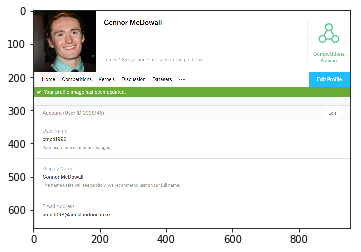

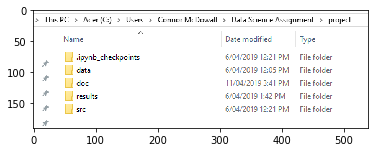

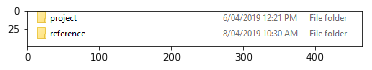

In [2]:
# Show the kaggle image (2.5)
img = mpimg.imread("C:/Users/Connor McDowall/Data Science Assignment/project/results/KS.png")
implot = plt.imshow(img,aspect = 'equal')
plt.show()

# Show the working directory setup for the data (2.6)
img1 = mpimg.imread("C:/Users/Connor McDowall/Data Science Assignment/project/results/L1.png")
img2 = mpimg.imread("C:/Users/Connor McDowall/Data Science Assignment/project/results/L2.png")
implot = plt.imshow(img1,aspect = 'equal')
plt.show()
implot = plt.imshow(img2,aspect = 'equal')
plt.show()

#### 2.7 Get the data
The data is already split into training and test data. The data was downloaded manually and saved to my hard drive.

In [3]:
# Create copies of the train and test original data
train_copy = pd.read_csv("C:/Users/Connor McDowall/Data Science Assignment/reference/train.csv", 
                 index_col=0, 
                 na_values='NaN', 
                 keep_default_na=False) 
test_copy = pd.read_csv("C:/Users/Connor McDowall/Data Science Assignment/reference/test.csv", 
                 index_col=0, 
                 na_values='NaN', 
                 keep_default_na=False)

#### 2.8 Convert the data
The data is aleady saved in csv files so conversion is not necessary.

#### 2.9 Check the size and type of data for both the data sets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

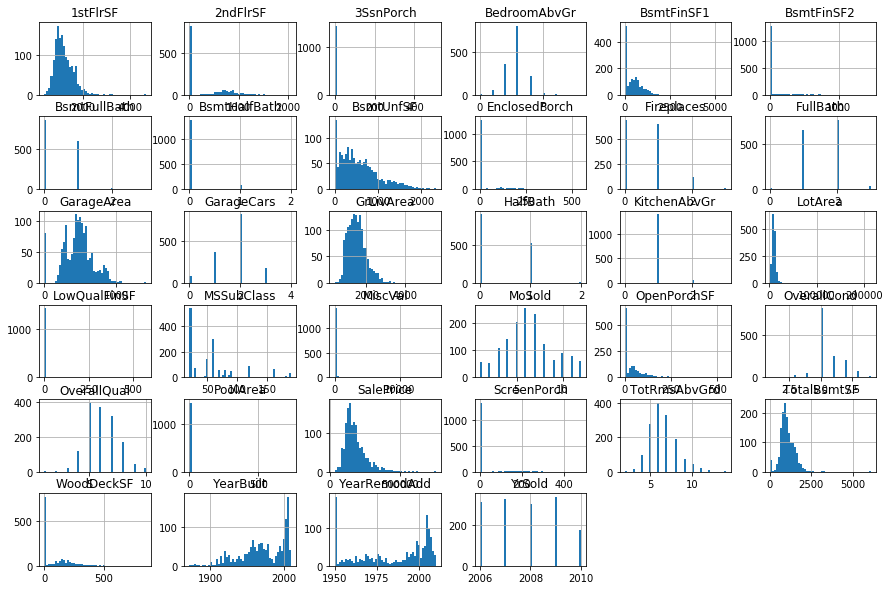

MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

LotFrontage

NA     259
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
21      23
90      23
64      19
24      19
68      19
73      18
79      17
72      17
63      17
55      17
100     16
74      15
51      15
66      15
52      14
59      13
71      12
43      12
57      12
40      12
67      12
      ... 
114      2
116      2
129      2
313      2
174      2
101      2
118      2
109      2
134      2
122      2
141      1
168      1
111      1
137      1
106      1
38       1
140      1
112      1
152      1
128      1
149      1
160      1
46       1
33       1
150      1
144      1
182      1
138      1
153      1
39       1
Name: LotFrontage, Length: 111, dtype: int64

Street

Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape

Reg  

In [4]:
# Display the training and test sets
train_copy.info()
test_copy.info()

# Create a copy of the training data
data_copy = train_copy
data_copy.info()

# Decribe each numerical attribute (Values with Null Variables are ignored)
data_copy.describe()

# Display a histogram for each numerical value
%matplotlib inline
data_copy.hist(bins=50,figsize = (15,10))
plt.show()

# Checks categorical Variables
# Set the length of data copy
for i in data_copy.columns:
    if data_copy[i].dtype == np.object:
        print(i)
        print("")
        print(data_copy[i].value_counts())
        print("")

#### 2.10 There is no sensitive information

#### 2.11 The data is already split up into a test and training sets so not required.
The kaggle website already takes care of this. The private/public leaderboard already has a 30%/70% split of the test data. 

#### 2.12 The workspace is setup correctly however this is not required for the assignment.

### 3 Explore the data

#### 3.1 Create a jupyter notebook to keep a record of your data exploration
Using this jupyter notebook

#### 3.2 Study each attribute and its characteristics

In [5]:
# Do some premature data cleasing to explore the data well
# Drop the rows without any values
data_copy.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900


In [1]:
# Loops through all the categorical variables to display
for i in data_copy.columns:
    if data_copy[i].dtype == np.object:
        # Tries to use the explore function, skips if NaN in the dataset (for cleansing later)
        data_copy[i].value_counts().plot(kind = 'bar')
        plt.show()
        
# Uses the explore function from the lecture to display outputs for numerical variables
def explore(feature, workaround = False):
    # http://stackoverflow.com/questions/40070093/gridspec-on-seaborn-subplots
    gridkw = dict(height_ratios=[5, 1])
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw, sharex=True)
    sns.distplot(feature, ax=ax1, kde=False) #array, top subplot
    sns.boxplot(feature, ax=ax2, width=.4) #bottom subplot
    ax1.set_xlabel('') 
    if workaround:
        print(feature.describe())
    else:
        ax1.text(1.05, 0.95, 
                 feature.describe(), 
                 transform=ax1.transAxes, fontsize=14,
                 verticalalignment='top')
    #http://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
    fig.subplots_adjust(top=0.9)
    fig.suptitle(feature.name, fontsize=16)
    
# Loops through all numerical variables
for i in data_copy.columns:
    if data_copy[i].dtype == np.int64 or data_copy[i].dtype == np.float64:
        # Tries to use the explore function
        try: 
            explore(data_copy[i])
        except Exception:
            pass

NameError: name 'data_copy' is not defined

#### 3.3 For supervised learning tasks, identify the target attribute
SalePrice is the target attribute as aligns with the business objective.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


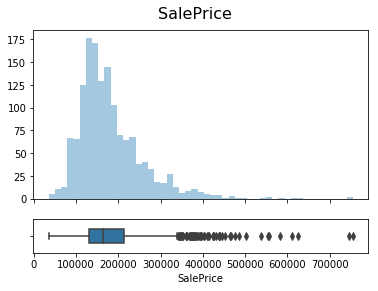

In [7]:
explore(data_copy["SalePrice"], workaround = True)

##### 3.3.1 Interpretation
The median sale price is around $163000 USD. Sale prices in the Ames, Iowa area show significant right skew.

#### 3.4 Visualise the data and 3.5 Study the correlations

In [8]:
# Study the correlations between attributes
# Forms the correlation matrix
corr_matrix = data_copy.corr()

#Looks at how each attribute correlates with sales price
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

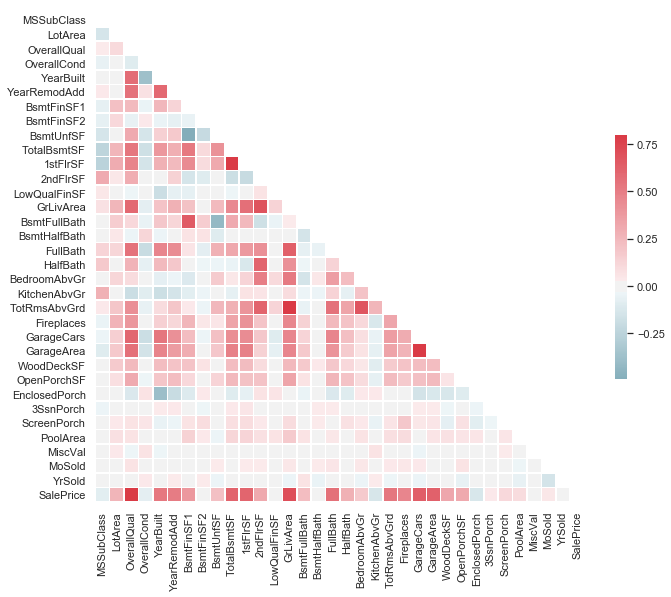

In [9]:
# Show a correlation plot on how everything is related.
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### 3.4.1 Interpretation

Some correlations were expected. SalePrice is strongly correlated with overall quality but interestingly also strongly correlated to above ground square living area. The size of garage in car capacity and size of garage in area are strongly correlated. SalePrice has no correlation to the MiscVal (The value of miscellaneuous features) or YrSold (the year the property was sold). Other correlations are expressed in the correlation plot above.

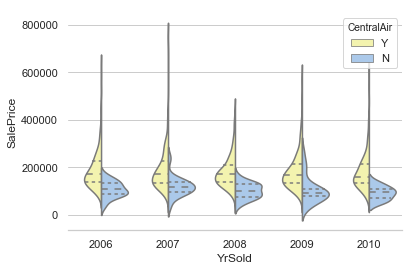

In [10]:
# Use a grouped voilins plot
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="YrSold", y="SalePrice", hue="CentralAir",
               split=True, inner="quart",
               palette={"Y": "y", "N": "b"},
               data=data_copy)
sns.despine(left=True)

##### 3.4.2 Interpretation

The violin plot shows that 75% houses with central air conditioning had higher sales prices than 75% of those without central air conditioning.

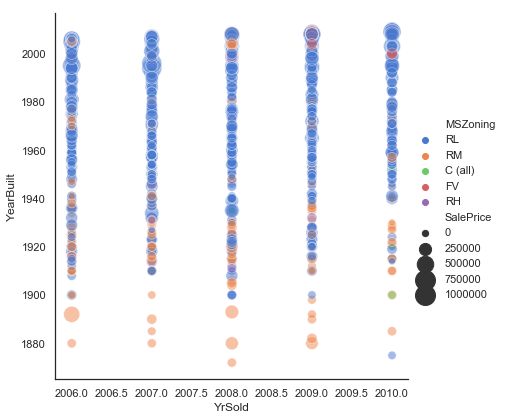

In [11]:
# Plot a scatter plot
sns.set(style="white")

# Plot Year Sold against Year Built with other Semantics
sns.relplot(x="YrSold", y="YearBuilt", hue="MSZoning", size="SalePrice",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_copy)

##### 3.4.3 Interpretation

More recently built houses are the ones sold more frequently across each year sold. However, prices do not vary much across age. The majority of houses sold are from residential low areas. There are less residential medium density homes sold and barely any commercial property sold. This may be due to urban sprawl and the growing number of suburban areas as cities may be becoming too densely populated.

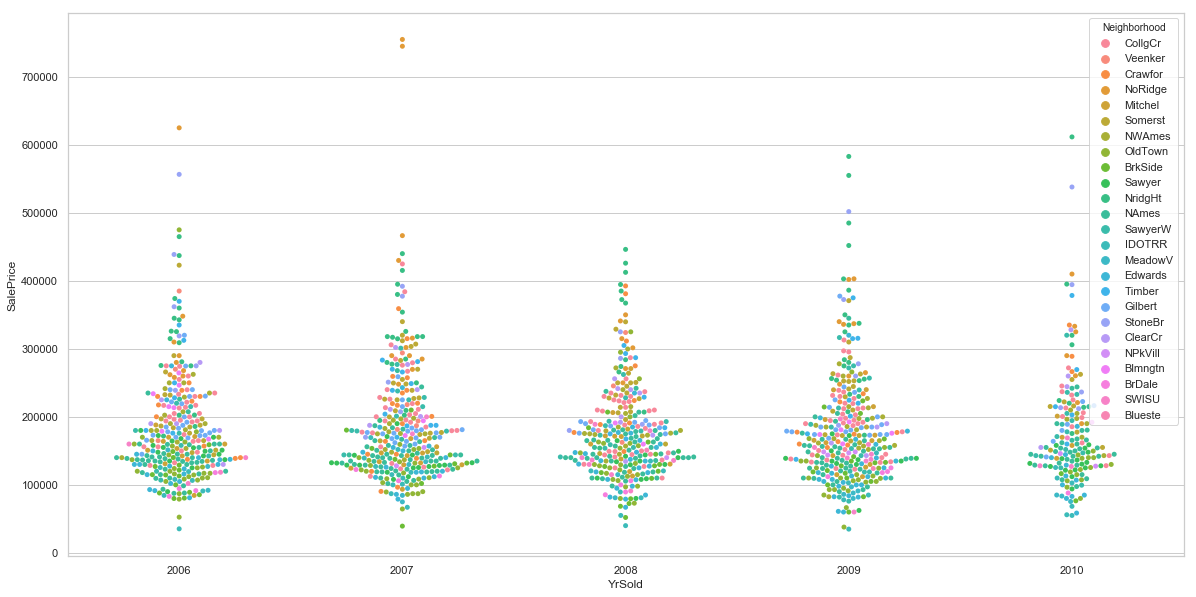

In [12]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" or "tidy" representation

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(20,10))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="YrSold", y="SalePrice", hue="Neighborhood", ax=ax, data=data_copy)

##### 3.4.4 Interpretation

Interesting, neighborhoods like Barkside and Sawyer have a lot of homes sold at the lower end of the sales price range. Blueste is in the mid range. Crawfor had a few houses sell at well above the rest in 2007. The large clumpings at the low end of the sale price validate the right skew shown in 3.3.1.

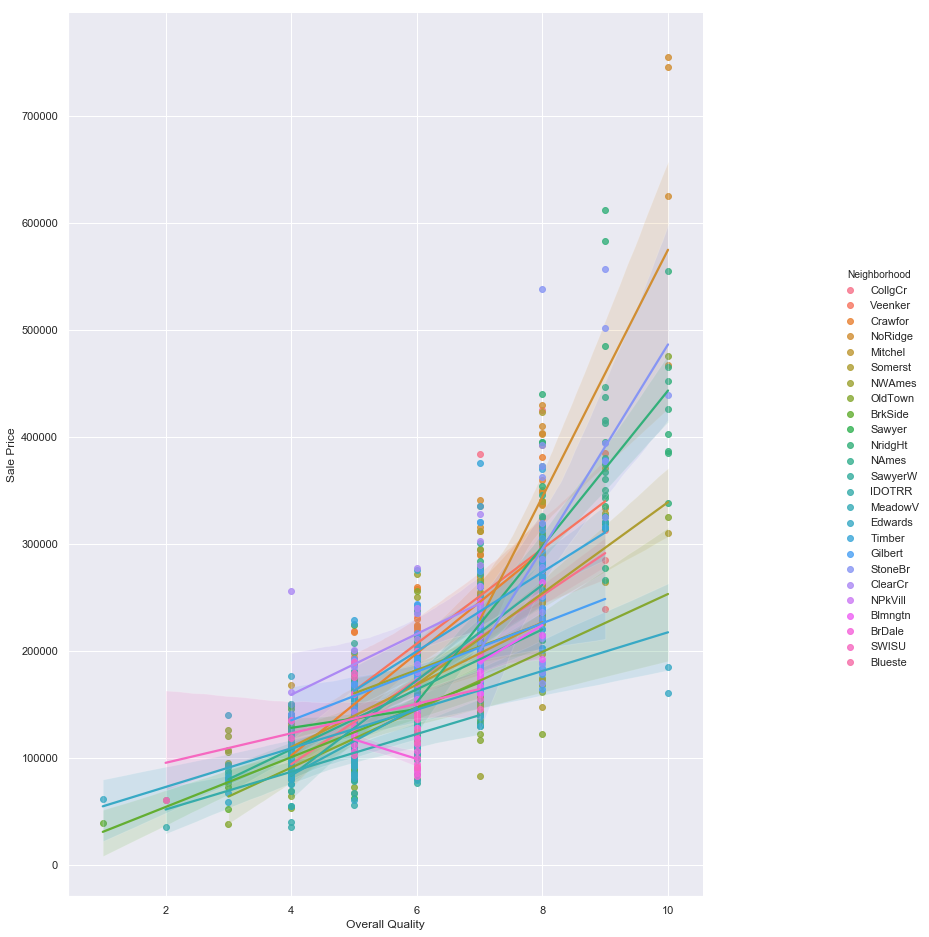

In [13]:
# Draw a simple line plot
sns.set()


# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="OverallQual", y="SalePrice", hue="Neighborhood",
               truncate=True, height=5, data=data_copy)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Overall Quality", "Sale Price")
g.fig.set_size_inches(15,15)

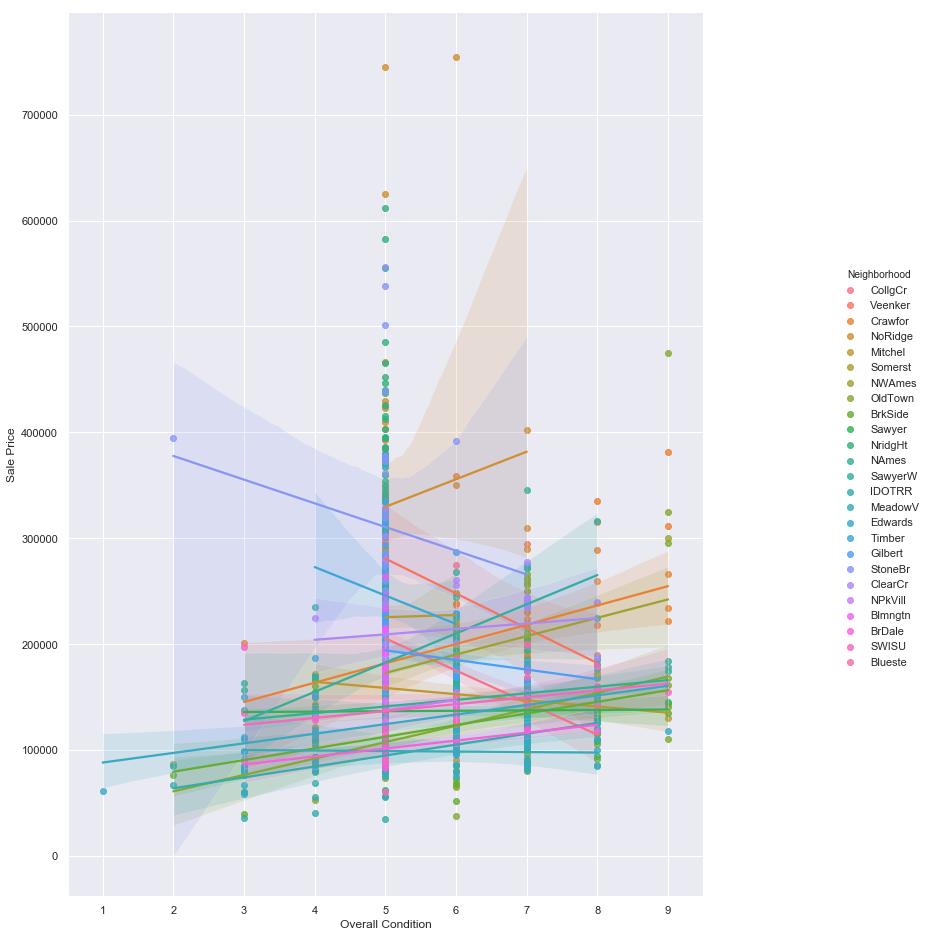

In [14]:
# Draw a simple line plot
sns.set()


# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="OverallCond", y="SalePrice", hue="Neighborhood",
               truncate=True, height=5, data=data_copy)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Overall Condition", "Sale Price")
g.fig.set_size_inches(15,15)

#### 3.4.5 Interpretation (Two Plots)

For every nighborhood, Sales price increases as the overall quality of the house increases (building materials etc). Interestingly, this is not the case with overall condition as the relationship depends on the neighborhood. Investors will most likely look at condition as comestic which can be easily fixed in renovations.

In [15]:
# Continue to explore the data and engineer new features
#Looks at how each attribute correlates with sales price (Was done before but repeated here)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### 3.6 Engineer New Features

#### 3.6 Engineer new features and identify useful transformations (For Part II).

In [18]:
# 3.6 Engineer new features
data_copy["BedroomPerLotArea"] = data_copy["BedroomAbvGr"]/data_copy["LotArea"]
data_copy["FireplacesPerRAG"] = data_copy["Fireplaces"]/data_copy["TotRmsAbvGrd"]
data_copy["CarPerGarageArea"] = data_copy["GarageCars"]/data_copy["GarageArea"]
data_copy["LivingAreaPerLotArea"] = data_copy["GrLivArea"]/data_copy["LotArea"]
data_copy["NumBathrooms"] = data_copy["FullBath"]+data_copy["HalfBath"]

# Show new correlation values
corr_matrix = data_copy.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

# Identifies and creates useful transformations
# Transformations to come.

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
NumBathrooms            0.568267
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
Fireplaces              0.466929
BsmtFinSF1              0.386420
FireplacesPerRAG        0.327115
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
ScreenPorch             0.111447
PoolArea                0.092404
MoSold                  0.046432
3SsnPorch               0.044584
LivingAreaPerLotArea   -0.002416
BsmtFinSF2             -0.011378
BsmtHalfBath           -0.016844
MiscVal   

#### 3.7 Study how to solve the problem manually
Hard to explore this problem manually

#### 3.8 Identify extra data that would be useful
GDP per neighbourhood, income, weather patterns, 

#### 3.9 Document what you have learned
Learning is documented under each of the 5 visualisations.

# End of Part I

# To Be Continued....